# Triangular Fuzzy Numbers for Applications to Multi-Component Decision Processes

In [1]:
import sys
sys.version

'3.10.2 (main, Feb  2 2022, 08:42:42) [Clang 13.0.0 (clang-1300.0.29.3)]'

* https://www.expertchoice.ir/wp-content/uploads/2017/08/FAHP-Chang-1996.pdf
* https://arxiv.org/pdf/1311.2886.pdf
* https://www.frontiersin.org/articles/10.3389/fpsyg.2021.715003/full
* https://www.sciencedirect.com/science/article/pii/S0957417420305625
* https://www.hindawi.com/journals/afs/2018/9094380/



Consider two triangular fuzzy numbers $M_{1}$ and $M_{2}, M_{1}=\left(l_{1}, m_{1}, u_{1}\right)$ and $M_{2}=\left(l_{2}, m_{2}, u_{2}\right) .$ Their operational laws are as follows:

1. $\begin{aligned} &\left(l_{1}, m_{1}, u_{1}\right) \oplus\left(l_{2}, m_{2}, u_{2}\right) = \left(l_{1}+l_{2}, m_{1}+m_{2}, u_{1}+u_{2}\right) . \end{aligned}$

2. $\left(l_{1}, m_{1}, u_{1}\right) \odot\left(l_{2}, m_{2}, u_{2}\right) \approx\left(l_{1} l_{2}, m_{1} m_{2}, u_{1} u_{2}\right) .$

3.  $(\lambda, \lambda, \lambda) \odot\left(l_{1}, m_{1}, u_{1}\right)=\left(\lambda l_{1}, \lambda m_{1}, \lambda u_{1}\right)$, $\lambda>0, \lambda \in R$.

4. $\left(l_{1}, m_{1}, u_{1}\right)^{-1} \approx\left(1 / u_{1}, 1 / m_{1}, 1 / l_{1}\right)$.


In [2]:
class ftn(object):
    def __init__( self, l, m, h):
        self.lmh = (l, m, h)
    def __getitem__(self, num):
        if num in [0,1,2]:
            return self.lmh[num]
        else:
            raise IndexError("Triangular Fuzzy Numbers have only three indexs and {0:s} is out of range".format( repr(num)))
    def __setitem__( self, num, val):
        if num in [0,1,2]:
            q = list(self.lmh)
            q[num] = val
            self.lmh = tuple(q)
        else:
            raise IndexError("Triangular Fuzzy Numbers have only three indexs and {0:s} is out of range".format( repr(num)))
    def __repr__(self):
        return "ftn({0:s},{1:s},{2:s})".format( repr( self.lmh[0]), repr(self.lmh[1]),repr(self.lmh[2]))
    def __add__( self, other):
        if type(other) is ftn:
            return ftn( self.lmh[0]+other.lmh[0], self.lmh[1]+other.lmh[1], self.lmh[2]+other.lmh[2])
        else:
            raise TypeError("Addition only supports two ftns not {0:s}".format( repr(type(other))))
    def __mul__(self, other):
        if type(other) is ftn:
            return ftn( self.lmh[0]*other.lmh[0], self.lmh[1]*other.lmh[1], self.lmh[2]*other.lmh[2])
        elif type(other) is int or type(other)is float:
            return ftn( self.lmh[0]*other, self.lmh[1]*other, self.lmh[2]*other)
        else:
            raise TypeError("Multiplication only supports ftns and ints and floats not {0:s}".format( repr(type(other))))
    def __rmul__( self, other):
        if type(other) is ftn:
            return ftn( self.lmh[0]*other.lmh[0], self.lmh[1]*other.lmh[1], self.lmh[2]*other.lmh[2])
        elif type(other) is int or type(other) is float:
            return ftn( self.lmh[0]*other, self.lmh[1]*other, self.lmh[2]*other)
        else:
            raise TypeError("Only supports ints and floats not {0:s}".format( repr(type(other))))
    def __truediv__(self, other):
        if type(other) is ftn:
            return ftn( self.lmh[0]/other.lmh[2], self.lmh[1]/other.lmh[1], self.lmh[2]/other.lmh[0])
        elif type(other) is float or type(other) is int:
            return ftn( self.lmh[0]/other, self.lmh[1]/other, self.lmh[2]/other)
    def __rtruediv__(self, other):
        if type(other) is ftn:
            return ftn( other.lmh[0]/self.lmh[2], other.lmh[1]/self.lmh[1], other.lmh[2]/self.lmh[0])
        elif type(other) is float or type(other) is int:
            return ftn( other/self.lmh[2], other/self.lmh[1], other/self.lmh[0])
        else:
            raise TypeError('Division of ftn with anything other than ftn, int, and floats is undefined')
    def __floordiv__(self, other):
        if type(other) is ftn:
            return ftn( self.lmh[0]//other.lmh[2], self.lmh[1]//other.lmh[1], self.lmh[2]//other.lmh[0])
        elif type(other) is float or type(other) is int:
            return ftn( self.lmh[0]//other, self.lmh[1]//other, self.lmh[2]//other)
        else:
            raise TypeError('Division of ftn with anything other than ftn, int, and floats is undefined')
            
F = ftn( 1,1,1)
G = ftn( 1, 2, 3)
F/G


ftn(0.3333333333333333,0.5,1.0)

In [3]:
G/F

ftn(1.0,2.0,3.0)

###### 

In [4]:
6*F

ftn(6,6,6)

In [5]:
G[2]

3

In [6]:
G[2] = 5

In [7]:
G

ftn(1,2,5)

In [8]:
# G[7] = 3 # this will throw an IndexError

$$
\mu_{(A)}(x)= \begin{cases}0, & x<a_{1} \\ \frac{x-a_{1}}{a_{2}-a_{1}}, & a_{1} \leq x \leq a_{2} \\ \frac{a_{3}-x}{a_{3}-a_{2}}, & a_{2} \leq x \leq a_{3} \\ 0, & x>a_{3}\end{cases}
$$

In [9]:
def tfn( fuzzy_num, pos):
    if pos < fuzzy_num[0]:
        return 0
    elif pos >= fuzzy_num[0] and pos <= fuzzy_num[1]:
        return (pos - fuzzy_num[0])/(fuzzy_num[1] - fuzzy_num[0])
    elif pos > fuzzy_num[1] and pos <= fuzzy_num[2]:
        return (fuzzy_num[2]- pos)/(fuzzy_num[2] - fuzzy_num[1])
    else:
        return 0

import numpy as np
x = list(np.arange( 0, 10, 0.1))
    
f1 = []
for x0 in x :
    f1.append( tfn( ftn(1,2,3), x0))
    


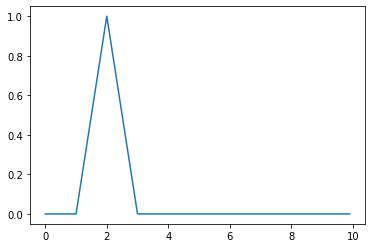

In [10]:

import matplotlib.pyplot as plt
plt.plot(x, f1, '-')
#plt.ylabel('some numbers')
plt.show()